### Treatment evaluation

In [36]:
addpath('../Classes','../Functions')
set(0, 'defaultFigureRenderer', 'painters')
warning('off','all')

In [ ]:
load('../Data/full_dataset.mat')

In [38]:
batches = unique([nw_array.PlatingDate]); %Refer to different batches via their PlatingDate property
inclusion_train = {{'PlatingDate',batches([1:2])}}; %Training on the first two batches
exclustion_train = {};
train_array = filterObjectArray(nw_array,inclusion_train,exclustion_train); %Apply 

inclusion_test = {{'PlatingDate',batches([3])}}; %Evaluating classifier on all cultures from the third batch 
exclustion_test = {};
test_array = filterObjectArray(nw_array,inclusion_test,exclustion_test); %Apply 

#### Set parameters

In [39]:
age_range = [0, 28]; %Set the week for which the features should be used // 6 uses all weeks
mat_idx = 1:2; %Indicate if single-cell, network, or both should be used // network is 1, single-cell is 2, both is 1:2
nw_sel = []; %Select specific network features // here we use all
sc_sel = []; %Select specific single-cell features // here we use all
alg = 'rf'; %Algorithm to be used // choices are 'svm','cnb','knn','rf'
TH = 3; %Set outlier detection threshold, value refers to the median absolute deviation multiplier // default is 3
N_hyper = 0; %Number of iterations for hyperparameter optimization //0 skips hyperparameter optimization

In [42]:
[clf,train_acc,pred,test_mutation,treatment] = evaluate_intervention(train_array,test_array,age_range,mat_idx,nw_sel,sc_sel,alg,TH,N_hyper);

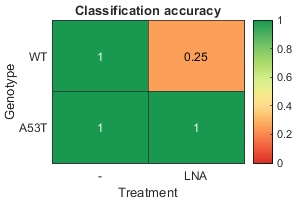

In [43]:
%plot --size 300,200
plot_treatment_evaluation(test_mutation,treatment,pred)

Now let's check out, how the LNA treatment impacts the age prediction! We start with the WT cultures:

In [44]:
batches = unique([nw_array.PlatingDate]); %Refer to different batches via their PlatingDate property
inclusion_array = {{{'PlatingDate',batches([1:3])},{'Mutation','wt'}},...
                    {{'PlatingDate',batches([1:3])},{'Mutation','wt'},{'Treatment','LNA7'}}}; %We use all non-LNA-treated WT cultures as training, and all LNA7-treated WT cultures as test
exclusion_array = {{{'Treatment','LNA7'}},...
                    {}}; 
vars2use = [1,2,4]; %Which variable sets to use // 1 is network, 2 is waveform, 4 is activity-based single-cell features
age_range = [0,29]; 

In [45]:
[age,pred_weeks,pI,vars,cl_train] = predictAgeFunction(nw_array,vars2use,age_range,inclusion_array,exclusion_array);

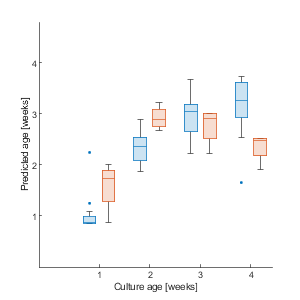

In [46]:
%plot --size 300,300
predictAgeBoxplot(age,pred_weeks);